## 3.Feature Engineering

In [1]:
# Module import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data (clean)/df_clean.csv')


In [2]:
# Anwendung von One-Hot-Encoding auf die kategorischen Merkmale
df_encoded = pd.get_dummies(df, columns=['Marke', 'Modell', 'Getriebe', 'Kraftstoffart'])

# Anzeige der ersten paar Zeilen des kodierten Datensatzes
df_encoded.head()


,Baujahr,Preis (£),Kilometerstand,Steuer (£),Verbrauch (l/100km),Motorgröße (l),Marke_Audi,Marke_Bmw,Marke_Cclass,Marke_Focus,...,Modell_230,Getriebe_Andere,Getriebe_Automatik,Getriebe_Halbautomatisch,Getriebe_Manuell,Kraftstoffart_Andere,Kraftstoffart_Benzin,Kraftstoffart_Diesel,Kraftstoffart_Elektrisch,Kraftstoffart_Hybrid
0,2017,12500,25322,150.0,4.25,1.4,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,2016,16500,58262,20.0,3.66,2.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,11000,48193,30.0,4.25,1.4,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2017,16800,41765,145.0,3.50,2.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2019,17300,3215,145.0,4.74,1.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


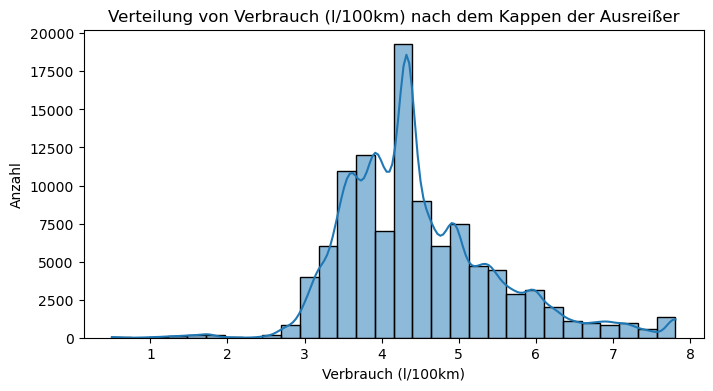

In [3]:
# Identifizierung des 99. Percentile des Verbrauchs
quantile_99 = df_encoded['Verbrauch (l/100km)'].quantile(0.99)

# Kappen der Ausreißer im Verbrauch auf den Wert des 99. Percentile
df_encoded['Verbrauch (l/100km)'] = df_encoded['Verbrauch (l/100km)'].apply(lambda x: min(x, quantile_99))

# Histogramm zur Überprüfung der Verteilung nach dem Kappen
plt.figure(figsize=(8, 4))
sns.histplot(df_encoded['Verbrauch (l/100km)'], bins=30, kde=True)
plt.title('Verteilung von Verbrauch (l/100km) nach dem Kappen der Ausreißer')
plt.xlabel('Verbrauch (l/100km)')
plt.ylabel('Anzahl')
plt.show()


In [4]:
# Berechnung des Autoalters basierend auf dem aktuellen Jahr und dem Baujahr
current_year = 2023
df_encoded['Autoalter'] = current_year - df_encoded['Baujahr']

# Anzeigen der ersten paar Zeilen, um das neue Merkmal zu überprüfen
df_encoded[['Baujahr', 'Autoalter']].head()


,Baujahr,Autoalter
0,2017,6
1,2016,7
2,2016,7
3,2017,6
4,2019,4


In [6]:
numerical_features = ['Baujahr', 'Preis (£)', 'Kilometerstand', 'Steuer (£)', 'Verbrauch (l/100km)', 'Motorgröße (l)']

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Definieren der Merkmale, die skaliert werden sollen
numerical_features_with_age = numerical_features + ['Autoalter']

# Anwenden der Min-Max-Skalierung
scaler = MinMaxScaler()
df_encoded[numerical_features_with_age] = scaler.fit_transform(df_encoded[numerical_features_with_age])

# Anzeige der ersten paar Zeilen nach der Skalierung
df_encoded.head()


,Baujahr,Preis (£),Kilometerstand,Steuer (£),Verbrauch (l/100km),Motorgröße (l),Marke_Audi,Marke_Bmw,Marke_Cclass,Marke_Focus,...,Getriebe_Andere,Getriebe_Automatik,Getriebe_Halbautomatisch,Getriebe_Manuell,Kraftstoffart_Andere,Kraftstoffart_Benzin,Kraftstoffart_Diesel,Kraftstoffart_Elektrisch,Kraftstoffart_Hybrid,Autoalter
0,0.896552,0.075525,0.048712,0.258621,0.512996,0.212121,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0.103448
1,0.862069,0.100596,0.112080,0.034483,0.432285,0.303030,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0.137931
2,0.862069,0.066124,0.092710,0.051724,0.512996,0.212121,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0.137931
3,0.896552,0.102476,0.080344,0.250000,0.410397,0.303030,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0.103448
4,0.965517,0.105610,0.006183,0.250000,0.580027,0.151515,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0.034483
